# Plot heatmap and logo of CDDM

## Setup

In [1]:
import pandas as pd
import numpy as np
from katlas.data import *
from katlas.pssm import *
from katlas.utils import *
from katlas.plot import *
from katlas.feature import *
from matplotlib import pyplot as plt
import seaborn as sns
import math

from sklearn.cluster import KMeans
from pathlib import Path
from tqdm import tqdm


In [37]:
%%time
df = Data.get_ks_dataset()

CPU times: user 737 ms, sys: 289 ms, total: 1.03 s
Wall time: 6.98 s


In [38]:
df.head()

,kin_sub_site,kinase_uniprot,substrate_uniprot,site,source,substrate_genes,substrate_phosphoseq,position,site_seq,sub_site,...,kinase_on_tree,kinase_genes,kinase_protein,kinase_group,kinase_family,kinase_subfamily,kinase_pspa_big,kinase_pspa_small,kinase_coral_ID,num_kin
0,O00141_A4FU28_S140,O00141,A4FU28,S140,Sugiyama,CTAGE9,MEEPGATPQPYLGLVLEELGRVVAALPESMRPDENPYGFPSELVVC...,140,AAAEEARSLEATCEKLSRsNsELEDEILCLEKDLKEEKSKH,A4FU28_S140,...,1,SGK1 SGK,SGK1,AGC,SGK,SGK,Basophilic,Akt/rock,SGK1,22
1,O00141_O00141_S252,O00141,O00141,S252,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,252,SQGHIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQ,O00141_S252,...,1,SGK1 SGK,SGK1,AGC,SGK,SGK,Basophilic,Akt/rock,SGK1,1
2,O00141_O00141_S255,O00141,O00141,S255,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,255,HIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQPYD,O00141_S255,...,1,SGK1 SGK,SGK1,AGC,SGK,SGK,Basophilic,Akt/rock,SGK1,1
3,O00141_O00141_S397,O00141,O00141,S397,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,397,sGPNDLRHFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEA,O00141_S397,...,1,SGK1 SGK,SGK1,AGC,SGK,SGK,Basophilic,Akt/rock,SGK1,1
4,O00141_O00141_S404,O00141,O00141,S404,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,404,HFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEAFLGFsYA,O00141_S404,...,1,SGK1 SGK,SGK1,AGC,SGK,SGK,Basophilic,Akt/rock,SGK1,1


In [39]:
df.shape

(187066, 21)

## logo heatmap

In [40]:
df['kinase_uniprot_gene'] = df['kinase_uniprot']+'_'+df['kinase_genes'].str.split(' ').str[0]

cnt = df.kinase_uniprot_gene.value_counts()

In [41]:
# cnt = df.kinase_coral_ID.value_counts()

In [42]:
def convert_source(x):
    if x == "Sugiyama":
        return x
    elif 'Sugiyama' in x and '|' in x:
        return 'Both'
    elif 'Sugiyama' not in x:
        return 'Non-Sugiyama'

In [43]:
df['source_combine'] = df.source.apply(convert_source)

In [44]:
def plot_hist_num_kin(df_k):
    "Plot histogram of num kin grouped by source_combine."
    g = sns.displot(
        df_k,
        x="num_kin",
        col="source_combine",
        bins=100,
        col_wrap=1,
        height=2.0,
        aspect=4,
        facet_kws={'sharex': False, 'sharey': False}
    )
    
    g.set_axis_labels("Number of Kinases per Site", "Count")
    
    # Customize titles
    for ax, source in zip(g.axes.flatten(), g.col_names):
        count = df_k[df_k['source_combine'] == source].shape[0]
        ax.set_title(f"{source} (n={count:,})")
    
    g.figure.suptitle("Histogram of # Kinases per Substrate Site")
    
    # Adjust layout to make room for suptitle
    plt.tight_layout()

In [45]:
def plot_cnt_cddm(df_k):
    "Plot source combine counts via bar graph."
    source_cnt = df_k.source_combine.value_counts()
    plot_cnt(source_cnt)
    plt.title('# Substrate Sites per Source',pad=20)

In [46]:
# plot_cnt_cddm(df_k)

In [47]:
def plot_cnt_acceptor(df_k):
    "Plot site type via bar graph."
    acceptor_cnt = df_k.acceptor.value_counts()
    plot_cnt(acceptor_cnt)
    plt.title('# Substrate Sites per Phospho-Acceptor Type',pad=20)

In [48]:
# plot_cnt_acceptor(df_k)

In [49]:
# set_sns()

In [50]:
# onehot = onehot_encode(df_k.site_seq)

In [51]:
def filter_range_columns(df,low=-10,high=10):
    positions = df.columns.str[:-1].astype(int)
    mask = (positions >= low) & (positions <= high)
    return df.loc[:,mask]

In [52]:
# positions = onehot.columns.str[:-1].astype(int)
# mask = (positions >= -10) & (positions <= 10)

# onehot = onehot.loc[:,mask]

# df_k['cluster'] = kmeans(onehot,n=10,seed=42)

# pssms = get_cluster_pssms(df_k,'cluster',valid_thr=0.5)

# kmeans_cnt = df_k.cluster.value_counts()

In [53]:
# plot_logos(pssms,kmeans_cnt)

In [54]:
def get_onehot_add_cluster(df_k,n=10):
    df_k = df_k.copy()
    onehot = onehot_encode(df_k.site_seq)
    onehot_10 = filter_range_columns(onehot)
    df_k['Cluster'] = kmeans(onehot_10,n=n,seed=42)
    df_k = df_k.reset_index(drop=True)
    return df_k,onehot_10

In [55]:
# df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)

In [56]:
def get_kmeans_logos(df_k,cnt_thr=10):
    pssms = get_cluster_pssms(df_k,'Cluster',valid_thr=0) # remove valid thr
    kmeans_cnt = df_k['Cluster'].value_counts()

    # filter cluster with >=10 counts
    valid_clusters = kmeans_cnt[kmeans_cnt >= cnt_thr].index
    filtered_pssms = pssms.loc[valid_clusters]
    
    if not filtered_pssms.empty: plot_logos(filtered_pssms,kmeans_cnt) 

In [57]:
# df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)
# get_kmeans_logos(df_k)

In [58]:
def plot_onehot(onehot_10,hue):
    plot_cluster(onehot_10,'pca',seed=42,complexity=30,hue=hue,legend=True,s=8)
    plt.title(f'PCA of One-Hot Encoded\n Substrate Site Sequences (n={len(onehot_10):,})')

In [59]:
# df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)
# plot_onehot(onehot_10,df_k['Cluster'])
# get_kmeans_logos(df_k)

In [60]:
# plot_cluster(onehot_10,'pca',seed=42,complexity=30,hue=df_k.cluster,legend=True,s=8)
# plt.title('PCA of One-Hot Encoded Sequences (-10 to +10')

In [61]:
# plot_logo_heatmap(pssm_df,title=f'{k} (n={len(df_k):,})',figsize=(17,10))


In [62]:
# for site_type in ['S','T','Y']:
#     df_sty = df[df.kinase_uniprot_gene.upper()==site_type].copy()
#     pssm_sty = get_prob(df_sty,'site_seq')
#     plot_logo_heatmap(pssm_sty,title=f'{site_type} sites (n={len(df_sty):,})',figsize=(17,10))
#     save_show()

In [63]:
# pssm_LO = get_pssm_LO(pssm_sty,'S')

In [64]:
# plot_logo_raw(pssm_LO,ytitle="Log-Odds Score (bits)")

In [65]:
# plot_logo_heatmap_enrich(pssm_LO)

In [66]:
# import logomaker

In [67]:
# for site_type in ['S','T','Y']:
#     df_sty = df_k[df_k.acceptor.str.upper()==site_type].copy()
#     pssm_sty = get_prob(df_sty,'site_seq')
#     plot_logo_heatmap(pssm_sty,title=f'{site_type} sites (n={len(df_sty):,})',figsize=(17,10))
#     save_show()
#     break

## Iterate

In [68]:
df['acceptor']=df.site.str[0]

In [69]:
SHOW=False

In [70]:
filter_cnt = cnt[cnt>=40]

In [71]:
list(filter_cnt.index).index('O43353_RIPK2')

301

In [78]:
for k in filter_cnt.index[235:]: break

In [79]:
k

'P41743_PRKCI'

In [76]:
def prepare_path(path):
    """Ensure the parent directory exists and return the full file path."""
    full_path = Path(path).expanduser()
    full_path.parent.mkdir(parents=True, exist_ok=True)
    return full_path

In [81]:
def save_show(path=None, # image path, e.g., img.svg, if not None, will save, else plt.show()
              show_only=False,
             ):
    "Show plot or save path"
    if show_only: plt.show()
    elif path is not None: 
        plt.savefig(path,
            bbox_inches='tight',
            pad_inches=0.05,
            transparent=True,
            )  
    else: plt.show()
    plt.close()

In [82]:
import matplotlib as mpl

import matplotlib as mpl

mpl.rcParams['svg.fonttype'] = 'none'     # keep text as <text>, not paths
mpl.rcParams['svg.image_inline'] = True   # embed images inline (set False to link)
mpl.rcParams['svg.hashsalt'] = ''         # avoid random IDs in defs
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.01

In [83]:
import gc

In [84]:
filter_cnt = cnt[cnt>=40]
for i,k in enumerate(filter_cnt.index[235:]): 
# for k in ['P00519_ABL1']:
    df_k = df[df.kinase_uniprot_gene==k].copy()
    # df_k = df_k[df_k.num_kin>10]
    

    # Freq PSSM
    pssm_df = get_prob(df_k,'site_seq')
    plot_logo_heatmap(pssm_df,title=f'{k} (n={len(df_k):,})',figsize=(17,10))
    path1=prepare_path(f'fig/cddm/{k}/pssm_freq.svg')
    save_show(path1,show_only=SHOW)

    # Log odds PSSM
    pssm_LO = get_pssm_LO(pssm_df,'STY')
    plot_logo_heatmap_LO(pssm_LO,title=f'{k} (n={len(df_k):,})',figsize=(17,10))
    path2=prepare_path(f'fig/cddm/{k}/pssm_LO.svg')
    save_show(path2,show_only=SHOW)
    

    # plot S, T and Y motif
    sty_cnt =df_k.acceptor.value_counts()
    acceptors = sty_cnt[(sty_cnt/len(df_k) > 0.08) & (sty_cnt>=10)].index # Skip this site_type if it has less than 8% or less than 10 count
    for site_type in acceptors:
        df_sty = df_k[df_k.acceptor.str.upper()==site_type].copy()

        # freq map
        pssm_sty = get_prob(df_sty,'site_seq')
        plot_logo_heatmap(pssm_sty,title=f'{k}: {site_type} sites (n={len(df_sty):,})',figsize=(17,10))
        path_3=prepare_path(f'fig/cddm/{k}/pssm_freq_{site_type}.svg')
        save_show(path_3,show_only=SHOW)

        # for log-odds
        pssm_LO = get_pssm_LO(pssm_sty,site_type)
        plot_logo_heatmap_LO(pssm_LO,acceptor=site_type,title=f'{k}: {site_type} sites (n={len(df_sty):,})',figsize=(17,10))
        path_4=prepare_path(f'fig/cddm/{k}/pssm_LO_{site_type}.svg')
        save_show(path_4,show_only=SHOW)

    
    path5=prepare_path(f'fig/cddm/{k}/bar_acceptor.svg')
    plot_cnt_acceptor(df_k)
    save_show(path5,show_only=SHOW)

    
    # count of source
    path6=prepare_path(f'fig/cddm/{k}/bar_source.svg')
    plot_cnt_cddm(df_k)
    save_show(path6,show_only=SHOW)

    # histogram of num kin
    path7=prepare_path(f'fig/cddm/{k}/hist_num_kin.svg')
    plot_hist_num_kin(df_k)
    save_show(path7,show_only=SHOW)


    
    # onehot of sequences
    # filter out noise acceptor for stratification
    df_k = df_k[df_k.acceptor.isin(acceptors)]
    df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)
    
    path8=prepare_path(f'fig/cddm/{k}/pca_onehot.svg')
    plot_onehot(onehot_10,df_k.Cluster)
    save_show(path8,show_only=SHOW)

    path9=prepare_path(f'fig/cddm/{k}/motif_kmeans.svg')
    get_kmeans_logos(df_k)
    save_show(path9,show_only=SHOW)

    path00=prepare_path(f'fig/cddm/{k}/df_k.parquet')
    
    df_k.to_parquet(path00)

    plt.close()
    if i % 10 == 0:
        gc.collect()
    
    # break

100%|███████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 93414.34it/s]


In [ ]:
genes = set(df_k.substrate_genes.str.split(' ').str[0])

In [ ]:
path_ref = pd.read_excel('raw/idmapping_kinase_info_2025_05_27.xlsx')

In [ ]:
k

'P00519_ABL1'

In [ ]:
path_ref['uniprot_gene'] = path_ref.uniprot+'_'+path_ref['Gene Names (primary)']

In [ ]:
idx_path = path_ref[path_ref.uniprot_gene==k].Reactome.str.split(';').iloc[0]

In [ ]:
path_df_raw

,stId,dbId,name,llp,inDisease,species.dbId,species.taxId,species.name,entities.resource,entities.total,entities.found,entities.ratio,entities.pValue,entities.fdr,entities.exp,reactions.resource,reactions.total,reactions.found,reactions.ratio
0,R-HSA-72649,72649,Translation initiation complex formation,True,False,48887,9606,Homo sapiens,TOTAL,62,39,0.003861,1.110223e-16,4.884981e-15,[],TOTAL,2,2,0.000129
1,R-HSA-72695,72695,"Formation of the ternary complex, and subseque...",True,False,48887,9606,Homo sapiens,TOTAL,54,33,0.003362,1.110223e-16,4.884981e-15,[],TOTAL,3,3,0.000193
2,R-HSA-72702,72702,Ribosomal scanning and start codon recognition,True,False,48887,9606,Homo sapiens,TOTAL,64,39,0.003985,1.110223e-16,4.884981e-15,[],TOTAL,2,2,0.000129
3,R-HSA-72662,72662,Activation of the mRNA upon binding of the cap...,True,False,48887,9606,Homo sapiens,TOTAL,66,39,0.004110,1.110223e-16,4.884981e-15,[],TOTAL,6,6,0.000386
4,R-HSA-72706,72706,GTP hydrolysis and joining of the 60S ribosoma...,True,False,48887,9606,Homo sapiens,TOTAL,120,66,0.007472,1.110223e-16,4.884981e-15,[],TOTAL,3,3,0.000193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,R-HSA-198933,198933,Immunoregulatory interactions between a Lympho...,True,False,48887,9606,Homo sapiens,TOTAL,249,1,0.015504,1.000000e+00,1.000000e+00,[],TOTAL,44,1,0.002829
1755,R-HSA-373076,373076,Class A/1 (Rhodopsin-like receptors),True,False,48887,9606,Homo sapiens,TOTAL,415,2,0.025841,1.000000e+00,1.000000e+00,[],TOTAL,187,3,0.012023
1756,R-HSA-425407,425407,SLC-mediated transmembrane transport,False,False,48887,9606,Homo sapiens,TOTAL,424,2,0.026401,1.000000e+00,1.000000e+00,[],TOTAL,200,2,0.012858
1757,R-HSA-500792,500792,GPCR ligand binding,False,False,48887,9606,Homo sapiens,TOTAL,610,4,0.037983,1.000000e+00,1.000000e+00,[],TOTAL,219,4,0.014080


In [ ]:
ref_paths = path_df_raw[path_df_raw.stId.isin(idx_path)]

In [ ]:
ref_paths.name

80      RUNX1 regulates transcription of genes involve...
129                  RHO GTPases Activate WASPs and WAVEs
157     Recruitment and ATM-mediated phosphorylation o...
306     MLL4 and MLL3 complexes regulate expression of...
423     Factors involved in megakaryocyte development ...
424                      Cyclin D associated events in G1
473     Turbulent (oscillatory, disturbed) flow shear ...
485     Regulation of actin dynamics for phagocytic cu...
526             HDR through Single Strand Annealing (SSA)
629                          FCGR3A-mediated phagocytosis
662                    Role of ABL in ROBO-SLIT signaling
922                                            Myogenesis
1193           RUNX2 regulates osteoblast differentiation
Name: name, dtype: object

In [ ]:
idx_path

['R-HSA-2029482',
 'R-HSA-428890',
 'R-HSA-525793',
 'R-HSA-5663213',
 'R-HSA-5685938',
 'R-HSA-5693565',
 'R-HSA-69231',
 'R-HSA-8939236',
 'R-HSA-8940973',
 'R-HSA-9664422',
 'R-HSA-983231',
 'R-HSA-9841922',
 'R-HSA-9860927',
 '']

In [ ]:
path_df = get_reactome(genes)

In [ ]:
path_df

,name,fdr,-log10_fdr
0,Translation initiation complex formation,4.884981e-15,14.311
1,"Formation of the ternary complex, and subseque...",4.884981e-15,14.311
2,Ribosomal scanning and start codon recognition,4.884981e-15,14.311
3,Activation of the mRNA upon binding of the cap...,4.884981e-15,14.311
4,GTP hydrolysis and joining of the 60S ribosoma...,4.884981e-15,14.311
...,...,...,...
1754,Immunoregulatory interactions between a Lympho...,1.000000e+00,0.000
1755,Class A/1 (Rhodopsin-like receptors),1.000000e+00,0.000
1756,SLC-mediated transmembrane transport,1.000000e+00,0.000
1757,GPCR ligand binding,1.000000e+00,0.000


In [ ]:
ref_paths.name.shape

(13,)

<Axes: xlabel='-log10(fdr)'>

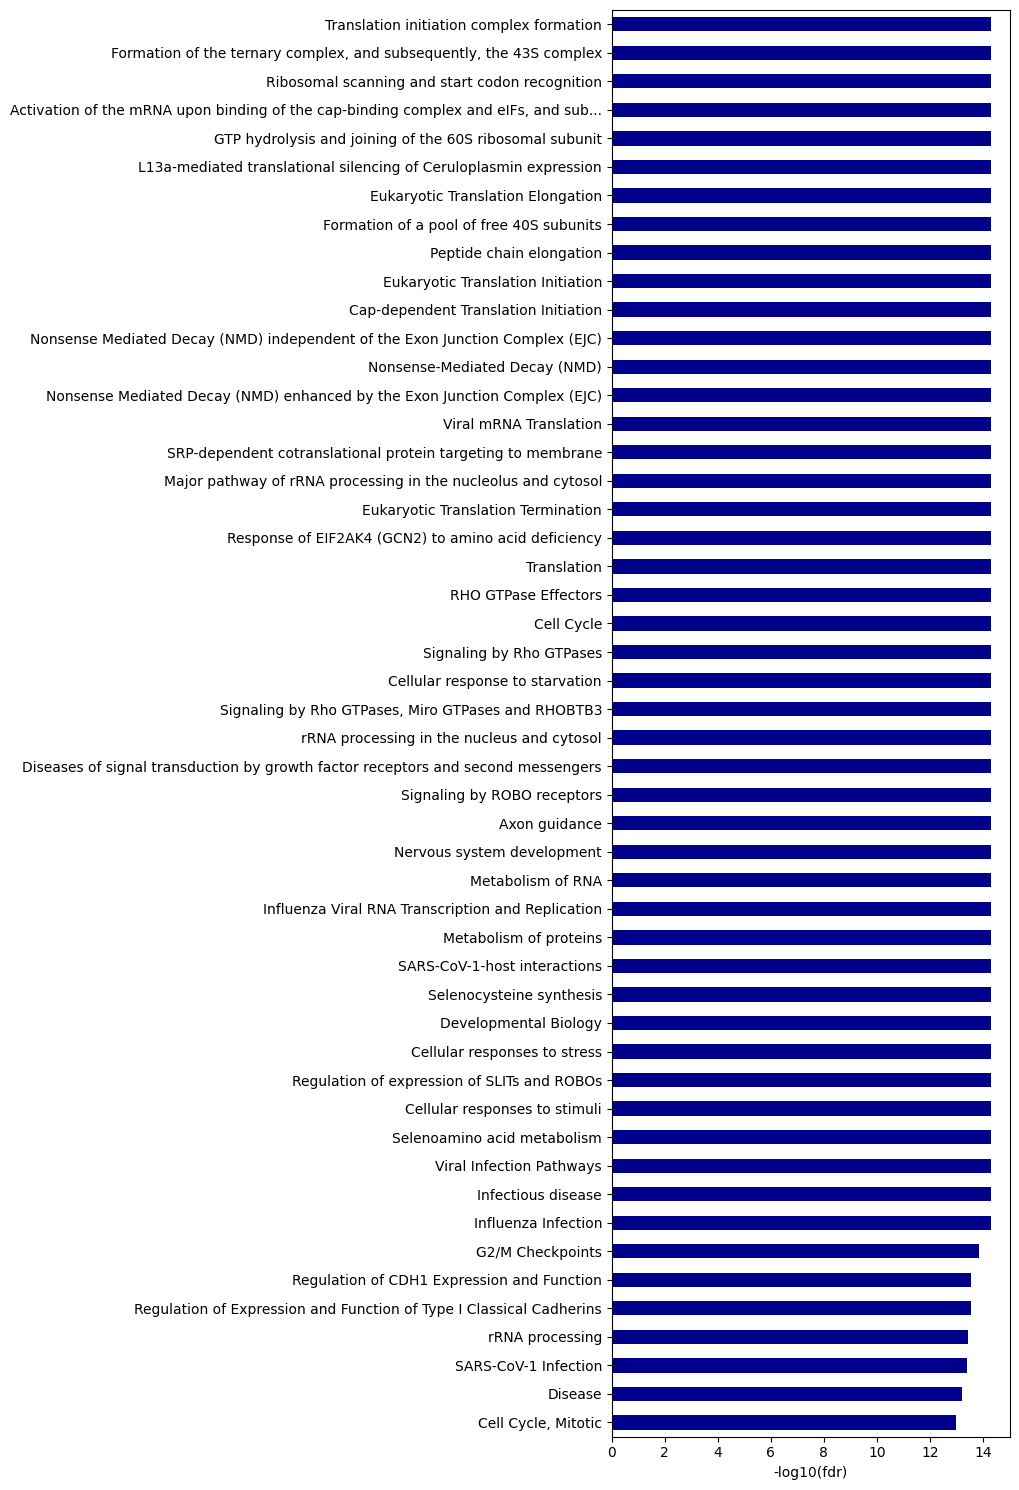

In [ ]:
plot_path(path_df,top_n=50,path_list=ref_paths.name)

In [ ]:
path_df_raw[path_df_raw.stId.isin(idx_path)]

In [ ]:
def get_reactome(gene_list,
                 col='entities.fdr', # column of p value or fdr (e.g., entities.pValue)
                 ref_list=None, # list of reactome idx
                ):
    "Reactome pathway analysis for a given gene set; returns formated output in dataframe with additional -log10(p)"
    out = get_reactome_raw(gene_list).copy()
    col_rename = col.split('.')[1]
    out = out[['stId','name',col]].rename(columns={col:col_rename,'stId':'ID'})
    out['significant']=(out[col_rename]<=0.05).astype(int)
    out[f'-log10({col_rename})'] = -np.log10(out[col_rename]).round(3)
    out[f'rank']=out[col_rename].rank().astype(int)
    if ref_list: out['in_ref']=out.ID.isin(ref_list).astype(int)
    
    return out

In [ ]:
out = get_reactome(genes,ref_list=idx_path)

In [ ]:
out[out.in_ref==1]

,ID,name,fdr,significant,-log10(fdr),rank,in_ref
80,R-HSA-8939236,RUNX1 regulates transcription of genes involve...,1.253766e-08,1,7.902,81,1
129,R-HSA-5663213,RHO GTPases Activate WASPs and WAVEs,3.404711e-06,1,5.468,130,1
157,R-HSA-5693565,Recruitment and ATM-mediated phosphorylation o...,1.482829e-05,1,4.829,156,1
306,R-HSA-9841922,MLL4 and MLL3 complexes regulate expression of...,6.713774e-04,1,3.173,304,1
423,R-HSA-983231,Factors involved in megakaryocyte development ...,4.163072e-03,1,2.381,424,1
424,R-HSA-69231,Cyclin D associated events in G1,4.191536e-03,1,2.378,426,1
473,R-HSA-9860927,"Turbulent (oscillatory, disturbed) flow shear ...",7.981719e-03,1,2.098,474,1
485,R-HSA-2029482,Regulation of actin dynamics for phagocytic cu...,9.889877e-03,1,2.005,486,1
526,R-HSA-5685938,HDR through Single Strand Annealing (SSA),1.734879e-02,1,1.761,527,1
629,R-HSA-9664422,FCGR3A-mediated phagocytosis,4.756334e-02,1,1.323,630,1


In [ ]:
out.fdr.rank()

0         22.0
1         22.0
2         22.0
3         22.0
4         22.0
         ...  
1754    1755.0
1755    1756.0
1756    1757.0
1757    1758.0
1758    1759.0
Name: fdr, Length: 1759, dtype: float64

In [ ]:
def plot_path(df,col='-log10(fdr)', top_n=10,max_label_length=80):
    "Plot the bar graph of pathways from get_reactome function."
    
    # Extract the data and reverse it
    data = df.head(top_n).set_index('name')[col].iloc[::-1]
    
    # Truncate labels if they are too long
    truncated_labels = [label[:max_label_length] + '...' if len(label) > max_label_length else label for label in data.index]
    data.index = truncated_labels

    # Calculate the required width: base width + additional width for the longest label
    base_width = 2
    max_label_length = max(data.index, key=len)
    additional_width = len(max_label_length) * 0.1  # Adjust scaling factor as needed
    
    figsize = (base_width + additional_width, 3*top_n/10)  # Adjust height as necessary

    data.plot.barh(figsize=figsize)
    plt.ylabel('')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt

def plot_path(df, col='-log10(fdr)', top_n=10, max_label_length=80, path_list=None):
    """
    Plot the bar graph of pathways from get_reactome function.
    Highlights pathways in path_list with a different color (dark red).
    """
    # Extract and reverse data
    data = df.head(top_n).set_index('name')[col].iloc[::-1]

    # Save original full names to match against path_list
    full_names = data.index.tolist()
    
    # Truncate labels if too long
    truncated_labels = [label[:max_label_length] + '...' if len(label) > max_label_length else label for label in full_names]
    data.index = truncated_labels

    # Determine colors
    if path_list is not None:
        path_set = set(path_list)
        colors = ['darkred' if name in path_set else 'darkblue' for name in full_names]
    else:
        colors = 'darkblue'

    # Calculate dynamic figure width
    base_width = 2
    max_label = max(data.index, key=len)
    additional_width = len(max_label) * 0.1
    figsize = (base_width + additional_width, 3 * top_n / 10)

    # Plot
    ax = data.plot.barh(figsize=figsize, color=colors)
    plt.ylabel('')
    plt.xlabel(col)
    plt.tight_layout()
    return ax

In [ ]:
path_fdr = path_df_raw[path_df_raw['entities.fdr']<0.05]

In [ ]:
path_fdr

,stId,dbId,name,llp,inDisease,species.dbId,species.taxId,species.name,entities.resource,entities.total,entities.found,entities.ratio,entities.pValue,entities.fdr,entities.exp,reactions.resource,reactions.total,reactions.found,reactions.ratio
0,R-HSA-72649,72649,Translation initiation complex formation,True,False,48887,9606,Homo sapiens,TOTAL,62,39,0.003861,1.110223e-16,4.884981e-15,[],TOTAL,2,2,0.000129
1,R-HSA-72695,72695,"Formation of the ternary complex, and subseque...",True,False,48887,9606,Homo sapiens,TOTAL,54,33,0.003362,1.110223e-16,4.884981e-15,[],TOTAL,3,3,0.000193
2,R-HSA-72702,72702,Ribosomal scanning and start codon recognition,True,False,48887,9606,Homo sapiens,TOTAL,64,39,0.003985,1.110223e-16,4.884981e-15,[],TOTAL,2,2,0.000129
3,R-HSA-72662,72662,Activation of the mRNA upon binding of the cap...,True,False,48887,9606,Homo sapiens,TOTAL,66,39,0.004110,1.110223e-16,4.884981e-15,[],TOTAL,6,6,0.000386
4,R-HSA-72706,72706,GTP hydrolysis and joining of the 60S ribosoma...,True,False,48887,9606,Homo sapiens,TOTAL,120,66,0.007472,1.110223e-16,4.884981e-15,[],TOTAL,3,3,0.000193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,R-HSA-8866427,8866427,VLDLR internalisation and degradation,True,False,48887,9606,Homo sapiens,TOTAL,16,4,0.000996,2.450345e-02,4.900690e-02,[],TOTAL,4,4,0.000257
632,R-HSA-8984722,8984722,Interleukin-35 Signalling,True,False,48887,9606,Homo sapiens,TOTAL,16,4,0.000996,2.450345e-02,4.900690e-02,[],TOTAL,26,25,0.001672
633,R-HSA-1679131,1679131,Trafficking and processing of endosomal TLR,True,False,48887,9606,Homo sapiens,TOTAL,16,4,0.000996,2.450345e-02,4.900690e-02,[],TOTAL,7,4,0.000450
634,R-HSA-879415,879415,Advanced glycosylation endproduct receptor sig...,True,False,48887,9606,Homo sapiens,TOTAL,16,4,0.000996,2.450345e-02,4.900690e-02,[],TOTAL,4,2,0.000257


In [ ]:
plot_path??

Signature: plot_path(react_out, top_n=10, max_label_length=80)
Source:   
def plot_path(react_out, top_n=10,max_label_length=80):
    "Plot the bar graph of pathways from get_reactome function."
    
    # Extract the data and reverse it
    data = react_out.head(top_n).set_index('name')['-log10_pValue'].iloc[::-1]
    
    # Truncate labels if they are too long
    truncated_labels = [label[:max_label_length] + '...' if len(label) > max_label_length else label for label in data.index]
    data.index = truncated_labels

    # Calculate the required width: base width + additional width for the longest label
    base_width = 2
    max_label_length = max(data.index, key=len)
    additional_width = len(max_label_length) * 0.1  # Adjust scaling factor as needed
    
    figsize = (base_width + additional_width, 3*top_n/10)  # Adjust height as necessary

    data.plot.barh(figsize=figsize)
    plt.ylabel('')
    plt.xlabel('-log10(p)')
    plt.tight_layout()
File:      ~/katlas/katlas/utils.

In [ ]:
path_fdr.loc[path_fdr['entities.ratio'].sort_values(ascending=False).index]

,stId,dbId,name,llp,inDisease,species.dbId,species.taxId,species.name,entities.resource,entities.total,entities.found,entities.ratio,entities.pValue,entities.fdr,entities.exp,reactions.resource,reactions.total,reactions.found,reactions.ratio
180,R-HSA-162582,162582,Signal Transduction,False,False,48887,9606,Homo sapiens,TOTAL,3049,267,0.189851,3.562203e-06,3.562203e-05,[],TOTAL,2584,1258,0.166131
48,R-HSA-1643685,1643685,Disease,False,True,48887,9606,Homo sapiens,TOTAL,2851,299,0.177522,1.554312e-15,6.061818e-14,[],TOTAL,2011,716,0.129292
94,R-HSA-168256,168256,Immune System,False,False,48887,9606,Homo sapiens,TOTAL,2664,256,0.165878,2.664359e-09,5.328718e-08,[],TOTAL,1733,791,0.111418
32,R-HSA-392499,392499,Metabolism of proteins,False,False,48887,9606,Homo sapiens,TOTAL,2417,268,0.150498,1.110223e-16,4.884981e-15,[],TOTAL,909,428,0.058442
188,R-HSA-74160,74160,Gene expression (Transcription),False,False,48887,9606,Homo sapiens,TOTAL,1990,186,0.123910,4.133596e-06,3.895872e-05,[],TOTAL,1140,486,0.073293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,R-HSA-9818025,9818025,NFE2L2 regulating TCA cycle genes,True,False,48887,9606,Homo sapiens,TOTAL,7,4,0.000436,1.440323e-03,5.761294e-03,[],TOTAL,4,4,0.000257
474,R-HSA-9649913,9649913,RAS GTPase cycle mutants,False,True,48887,9606,Homo sapiens,TOTAL,4,3,0.000249,2.704293e-03,8.112878e-03,[],TOTAL,2,2,0.000129
475,R-HSA-9753510,9753510,Signaling by RAS GAP mutants,True,True,48887,9606,Homo sapiens,TOTAL,4,3,0.000249,2.704293e-03,8.112878e-03,[],TOTAL,1,1,0.000064
476,R-HSA-9753512,9753512,Signaling by RAS GTPase mutants,True,True,48887,9606,Homo sapiens,TOTAL,4,3,0.000249,2.704293e-03,8.112878e-03,[],TOTAL,1,1,0.000064


In [ ]:
path_df = get_reactome(genes)

In [ ]:
plot_path??

Signature: plot_path(react_out, top_n=10, max_label_length=80)
Source:   
def plot_path(react_out, top_n=10,max_label_length=80):
    "Plot the bar graph of pathways from get_reactome function."
    
    # Extract the data and reverse it
    data = react_out.head(top_n).set_index('name')['-log10_pValue'].iloc[::-1]
    
    # Truncate labels if they are too long
    truncated_labels = [label[:max_label_length] + '...' if len(label) > max_label_length else label for label in data.index]
    data.index = truncated_labels

    # Calculate the required width: base width + additional width for the longest label
    base_width = 2
    max_label_length = max(data.index, key=len)
    additional_width = len(max_label_length) * 0.1  # Adjust scaling factor as needed
    
    figsize = (base_width + additional_width, 3*top_n/10)  # Adjust height as necessary

    data.plot.barh(figsize=figsize)
    plt.ylabel('')
    plt.xlabel('-log10(p)')
    plt.tight_layout()
File:      ~/katlas/katlas/utils.

In [ ]:
path_df

,name,pValue,-log10_pValue
0,Translation initiation complex formation,1.110223e-16,15.955
1,"Formation of the ternary complex, and subseque...",1.110223e-16,15.955
2,Ribosomal scanning and start codon recognition,1.110223e-16,15.955
3,Activation of the mRNA upon binding of the cap...,1.110223e-16,15.955
4,GTP hydrolysis and joining of the 60S ribosoma...,1.110223e-16,15.955
...,...,...,...
1754,Immunoregulatory interactions between a Lympho...,1.000000e+00,0.000
1755,Class A/1 (Rhodopsin-like receptors),1.000000e+00,0.000
1756,SLC-mediated transmembrane transport,1.000000e+00,0.000
1757,GPCR ligand binding,1.000000e+00,0.000


Text(0.5, 1.0, 'AKT1')

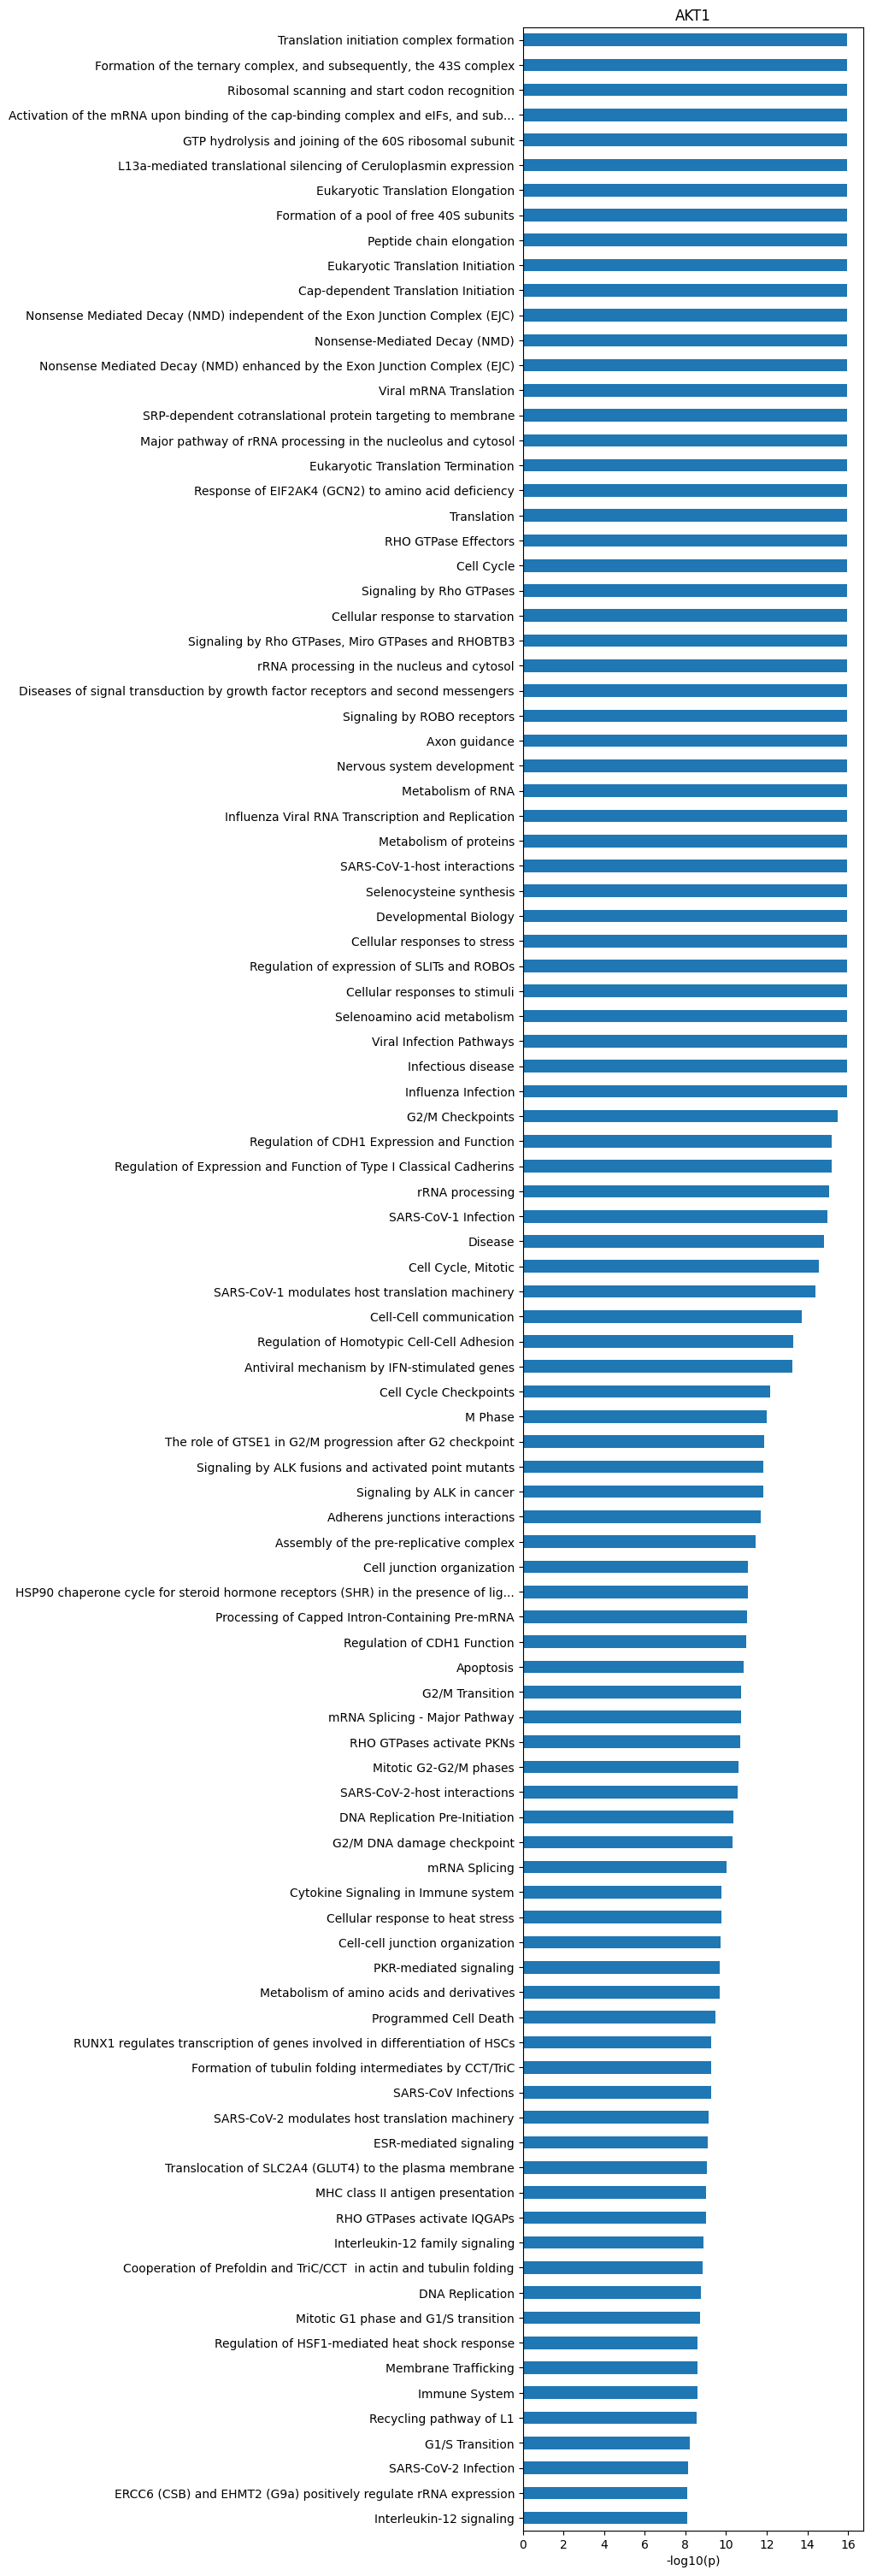

In [ ]:
plot_path(path_df,100)
plt.title('AKT1')

In [ ]:
genes

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

from katlas.core import *
from katlas.plot import *

from scipy.stats import spearmanr, pearsonr

import os
from PIL import Image
from tqdm import tqdm

In [ ]:
def plot_count(df_k,title):
    # Get value counts
    source_counts = df_k.source.replace({'pplus':'PP','large_scale':'LS'}).value_counts()
    plt.figure(figsize=(7,1))

    source_counts.plot(kind='barh', stacked=True, color=['darkred', 'darkblue'])
    # Annotate with the actual values
    for index, value in enumerate(source_counts):
        plt.text(value, index, str(value),fontsize=10,rotation=-90, va='center')

    plt.xlabel('Count')
    plt.title(title)

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

## Load data

In [ ]:
df = Data.get_ks_dataset()
df['SUB'] = df.substrate.str.upper()

In [ ]:
info = Data.get_kinase_info().query('pseudo=="0"')

In [ ]:
# It only contains kinase on the tree
cnt = df.kinase_paper.value_counts()

In [ ]:
ST = info[info.group!="TK"].kinase

In [ ]:
df[df.kinase_paper.isin(ST)].kinase_paper.value_counts()[10:20]

NEK6     950
PLK1     943
CK2A1    919
P38D     907
DYRK2    907
HGK      902
TTBK1    896
MST3     890
MST1     884
IKKE     880
Name: kinase_paper, dtype: int64

In [ ]:
cnt = cnt[cnt>100]

## Generate example figures

In [ ]:
def plot_heatmap2(matrix, title, figsize=(6,10), label_size=20):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, cmap='binary', annot=False,cbar=False)
    plt.title(title,fontsize=label_size)
        # Set the font size for the tick labels
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    plt.xlabel('')
    plt.ylabel('')

In [ ]:
kinase_list = ['SRC','ABL1','ERK2','PKACA']

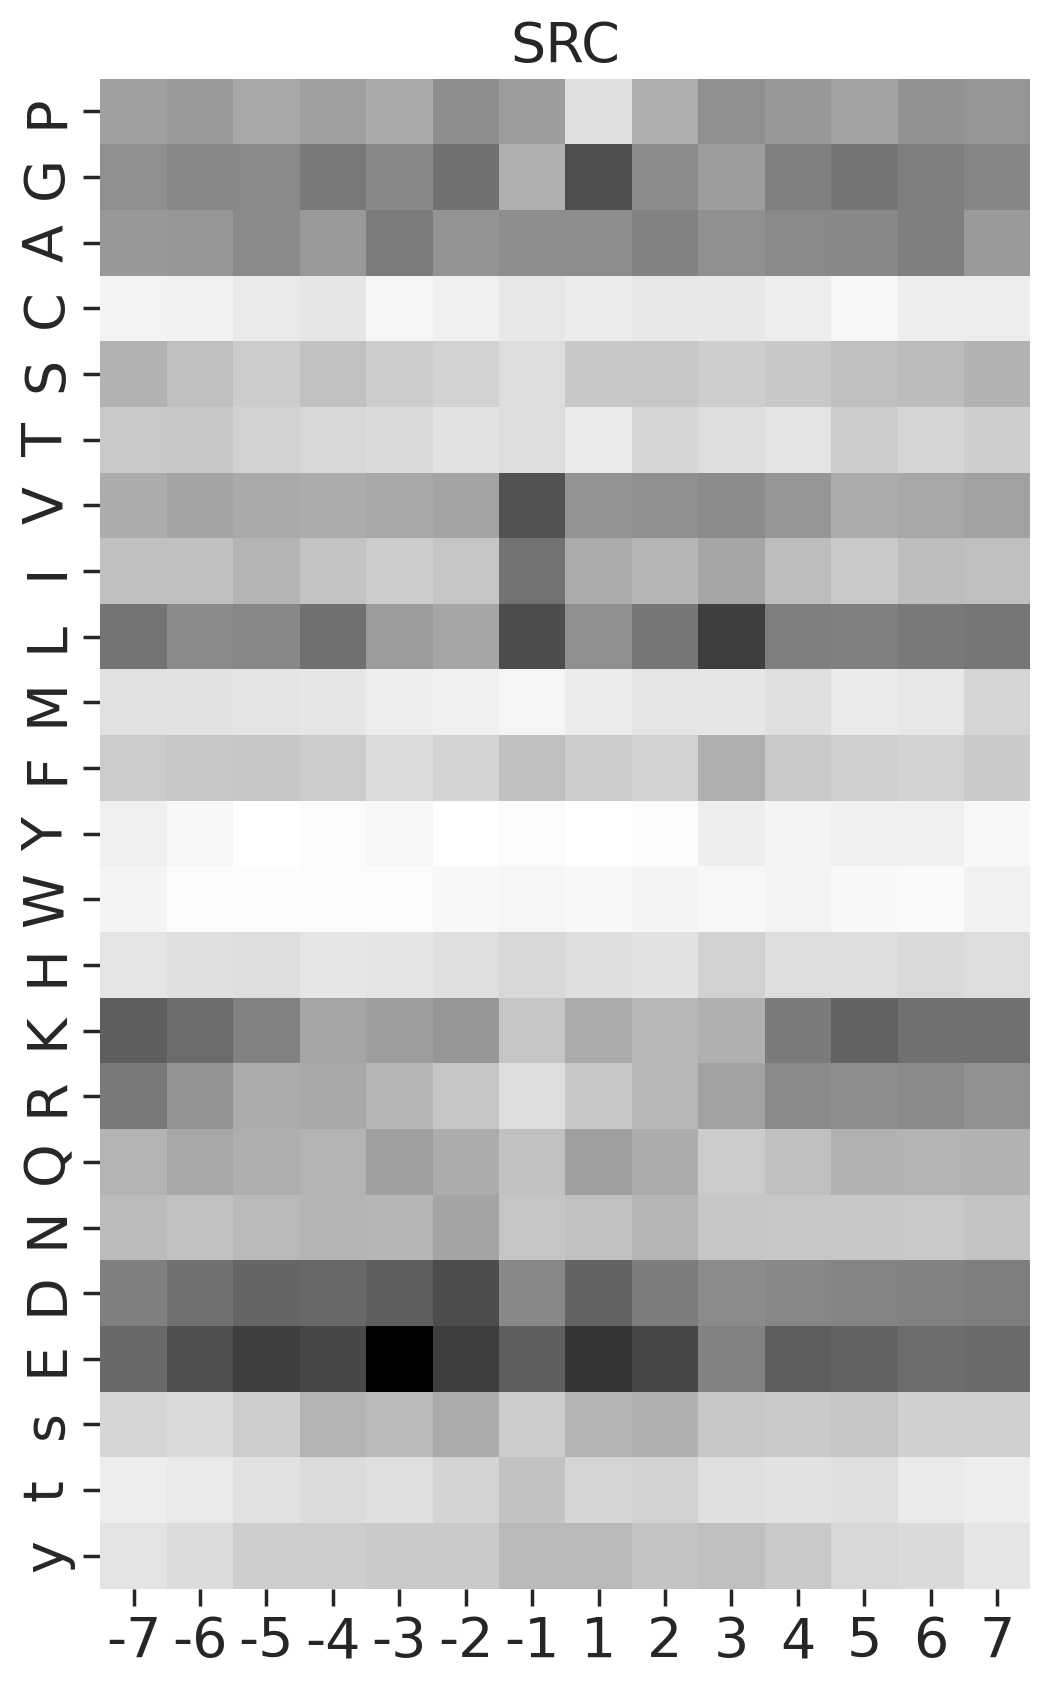

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

for k in kinase_list:
    df_k = df.query(f'kinase=="{k}"')
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()

    paper,full = get_freq(df_k)

    plot_heatmap2(full.drop(columns=[0]),f'{k}',figsize=(6,10))
    plt.show()
    plt.close()
        
    break

    # if you want to generate and save all of figures, uncomment below
    # plt.savefig(f'fig/{k}.png',bbox_inches='tight', pad_inches=0.3)
    # plt.close()

## Generate all figures

Uncomment plt.savefig to save figures

  0%|          | 0/289 [00:00<?, ?it/s]

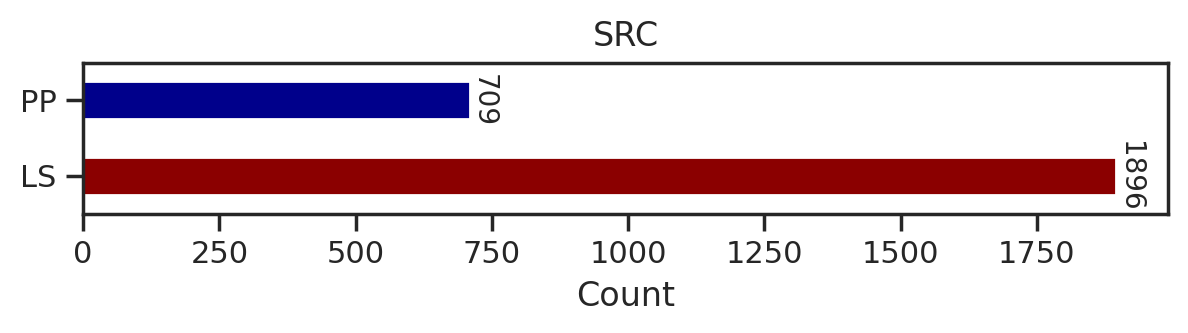

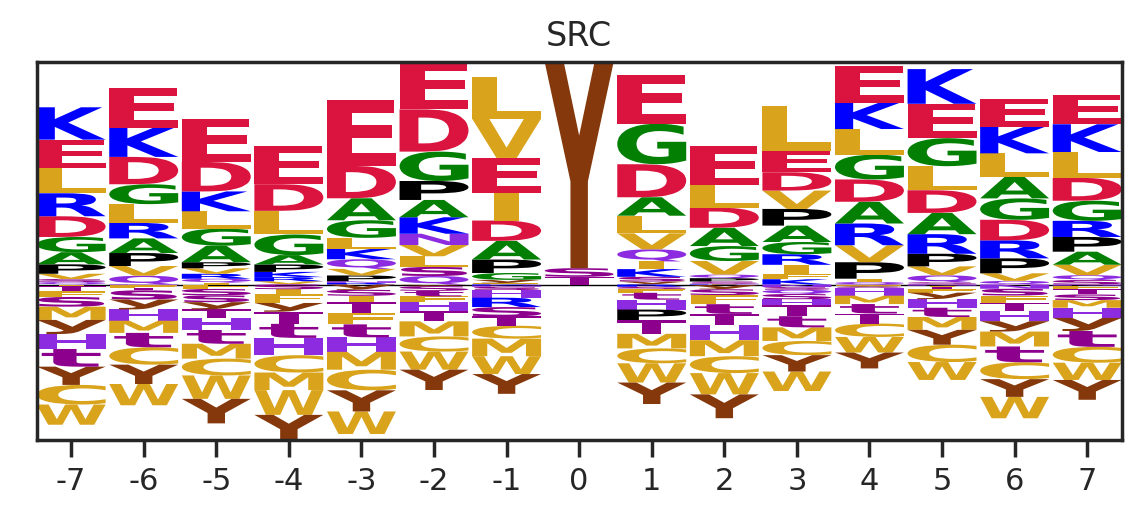

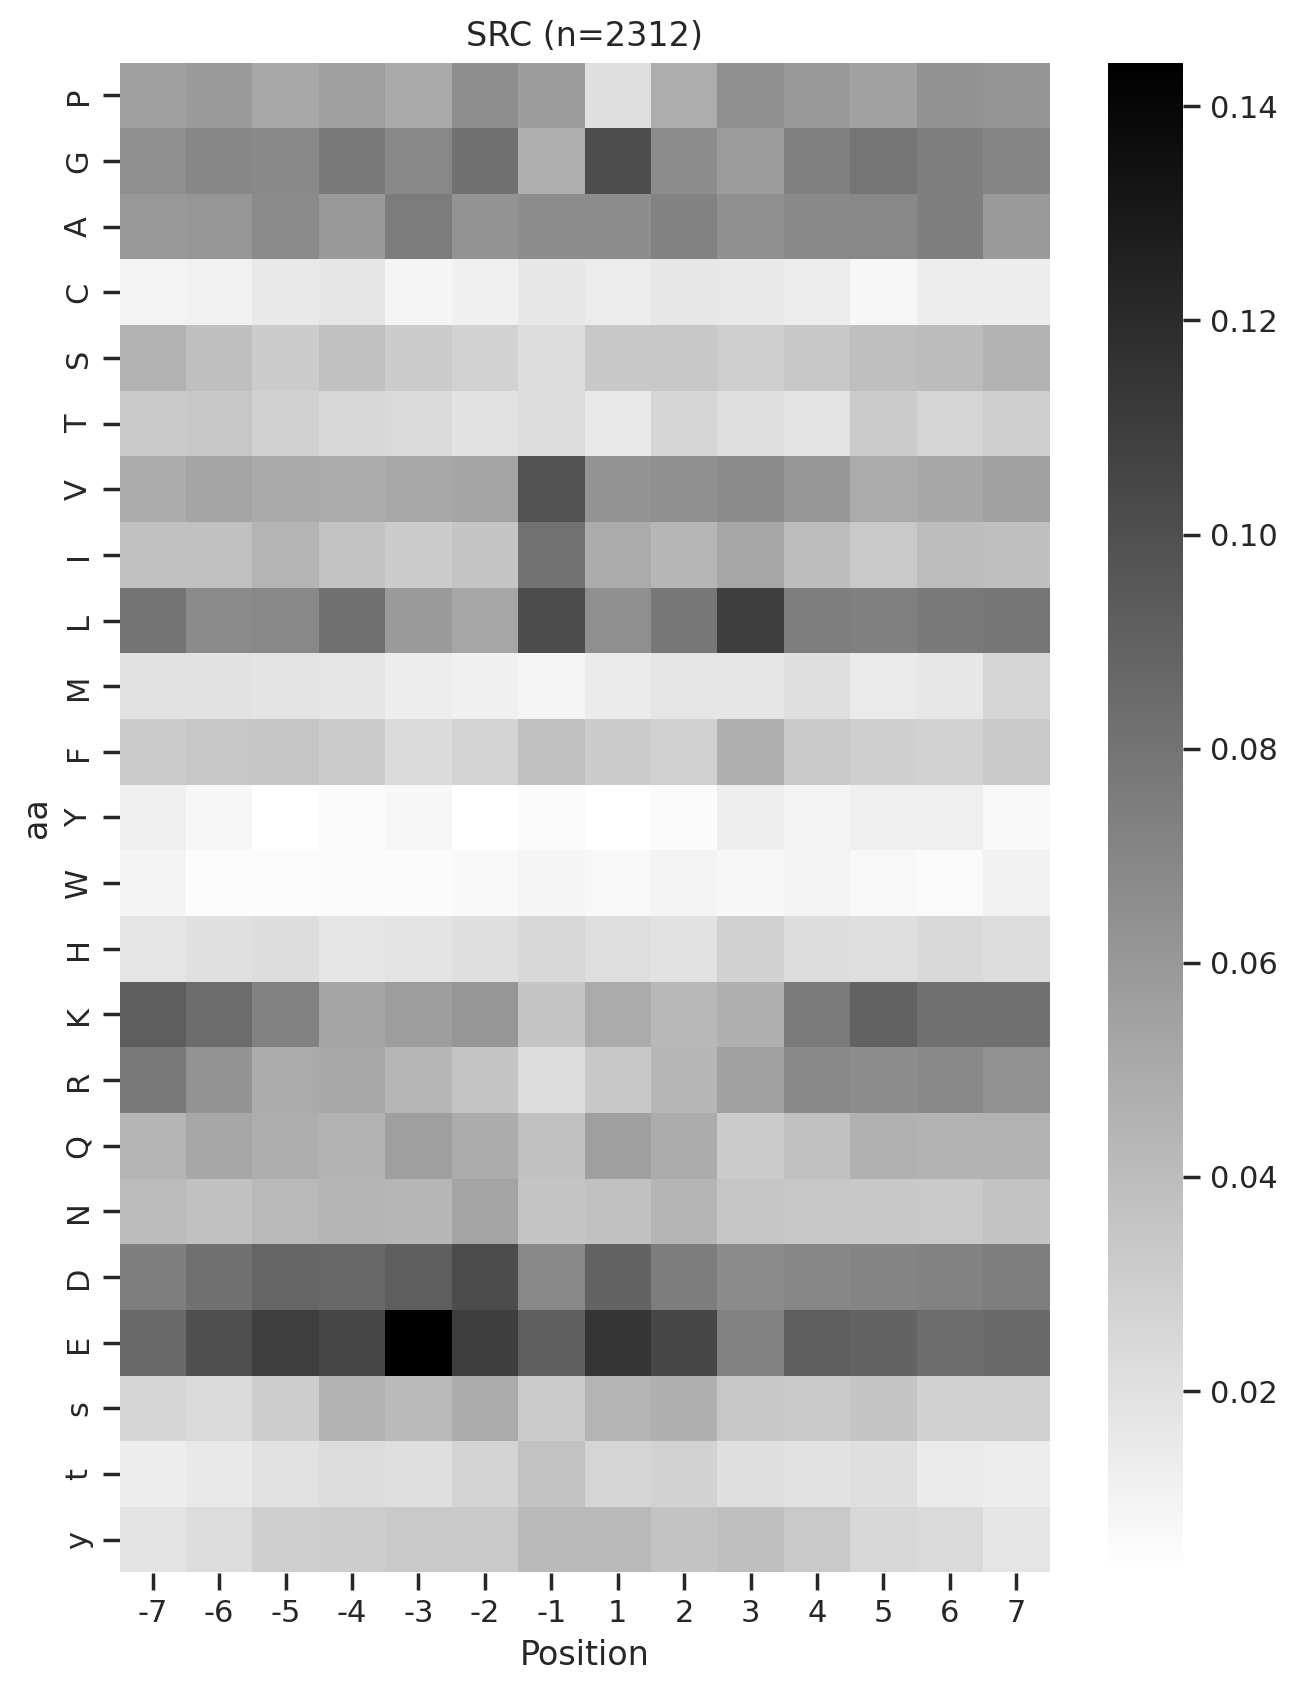

  0%|          | 0/289 [00:02<?, ?it/s]


In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

for k in tqdm(cnt.index,total=len(cnt)):
    
    df_k = df.query(f'kinase=="{k}"')
    
    plot_count(df_k,k)
    # plt.savefig(f'fig/count/{k}.png',bbox_inches='tight', pad_inches=0.1)
    plt.show() # if visualize in jupyter notebook, uncheck the savefig
    plt.close()
    
    
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)

    get_logo2(full, k)
    # plt.savefig(f'fig/logo/{k}.png',bbox_inches='tight', pad_inches=0.3)
    plt.show()
    plt.close()

    plot_heatmap(full.drop(columns=[0]),f'{k} (n={len(df_k)})',figsize=(7.5,10))
    # plt.savefig(f'fig/heatmap/{k}.png',bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    # break
    break

## Combine figures for pdf

In [ ]:
def combine_images_vertically(image_paths, output_path):
    images = [Image.open(image_path).convert('RGBA') for image_path in image_paths]
    
    total_width = max(image.width for image in images)
    total_height = sum(image.height for image in images)

    combined_image = Image.new('RGBA', (total_width, total_height))

    y_offset = 0
    for image in images:
        combined_image.paste(image, (0, y_offset), image)
        y_offset += image.height

    combined_image.save(output_path)

Uncomment below to run

In [ ]:
# folders = ["fig/count", "fig/logo", "fig/heatmap"]
# for k in tqdm(cnt.index,total=len(cnt)):
#     filename = f"{k}.png"
#     image_paths = [os.path.join(folder, filename) for folder in folders]
#     output_path = f"fig/combine/{k}.png"
    
#     combine_images_vertically(image_paths, output_path)
#     # break

## Get PSSM data of CDDM

In [ ]:
for i,k in enumerate(cnt.index):
    
    df_k = df.query(f'kinase=="{k}"')
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)

    melt = full.drop(columns = [0]).reset_index().melt(id_vars=['aa'], value_name=k, var_name='Position')
    melt['substrate']=melt['Position'].astype(str)+ melt['aa']

    position_0 = full[0][['s','t','y']].reset_index().rename(columns={0:k})
    position_0['substrate'] = '0'+position_0['aa']

    if i ==0:
        first = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
    else:
        k = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
        data = pd.concat([first,k],axis=1)
        first = data.copy()
    
    # break

In [ ]:
data = data.T

data.index = data.index.rename('kinase')

To save

In [ ]:
# data.to_csv('supp/CDDM.csv')

# data.to_parquet('ks_main.parquet')

## Get specialized CDDM data for all-capital substrates
>combine s,t,y to S,T,Y

In [ ]:
# List of suffixes
suffixes = ['S', 'T', 'Y']

for suffix in suffixes:
    for i in range(-7, 8):  # looping from -7 to 7
        if i == 0:  # Skip 0
            continue
        
        upper_col = f"{i}{suffix}"  # e.g., -7S
        lower_col = f"{i}{suffix.lower()}"  # e.g., -7s
        data[upper_col] = data[upper_col] + data[lower_col]
        data.drop(lower_col, axis=1,inplace=True)  # Drop the lowercase column after combining

In [ ]:
data.columns[data.columns.str.contains('S')]

Index(['-7S', '-6S', '-5S', '-4S', '-3S', '-2S', '-1S', '1S', '2S', '3S', '4S',
       '5S', '6S', '7S'],
      dtype='object', name='substrate')

In [ ]:
# make sure the "s" in positions other than 0 is deleted from the columns
data.columns[data.columns.str.contains('s')]

Index(['0s'], dtype='object', name='substrate')

In [ ]:
# Make sure very position's sum is 1
data.loc[:,data.columns.str.contains('-7')].sum(1).sort_values()

kinase
DDR2      1.0
NEK11     1.0
MSK1      1.0
TEK       1.0
NIM1      1.0
         ... 
CAMK2G    1.0
PKG2      1.0
MELK      1.0
NEK1      1.0
TLK2      1.0
Length: 289, dtype: float64

In [ ]:
data = data.rename(columns={'0s':'0S','0t':'0T','0y':'0Y'})

In [ ]:
data.index = data.index.rename('kinase')

To save

In [ ]:
# data.to_parquet('ks_main_upper.parquet')
# data.to_csv('supp/CDDM_upper.csv')

## Plot other kinases (mutated, lipid kinase, isoforms)
> kinases not on kinome tree

In [ ]:
cnt_other = df.query('on_tree==0').kinase.value_counts()

cnt_other = cnt_other[cnt_other>100]

In [ ]:
others = cnt_other.index.tolist()+['LYN','ABL1','RET','FGFR3','PDGFRA','ALK',
                          'EGFR','KIT','MET','PKCB','BRAF','PKG1'] # BRAF is less than 100

Uncheck savefig to save figures

  0%|          | 0/36 [00:00<?, ?it/s]

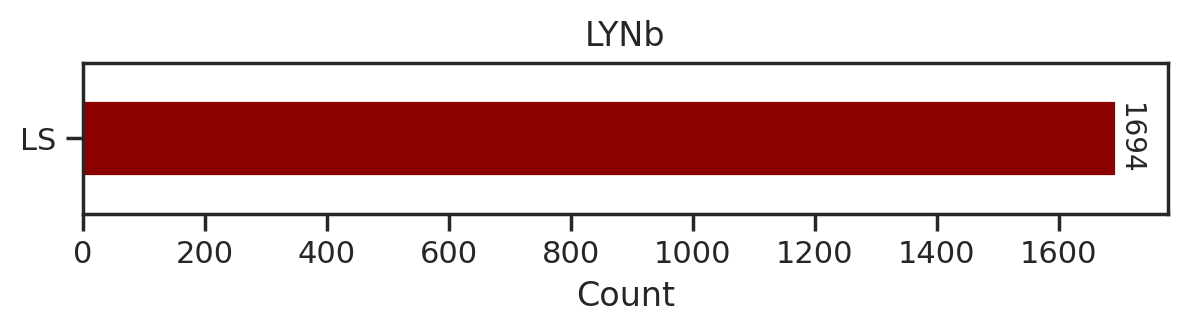

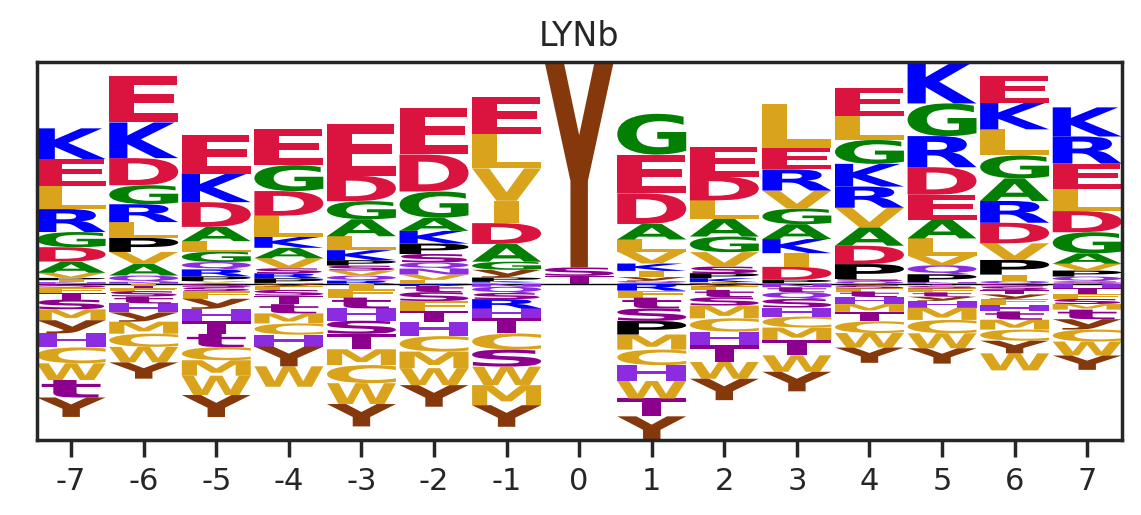

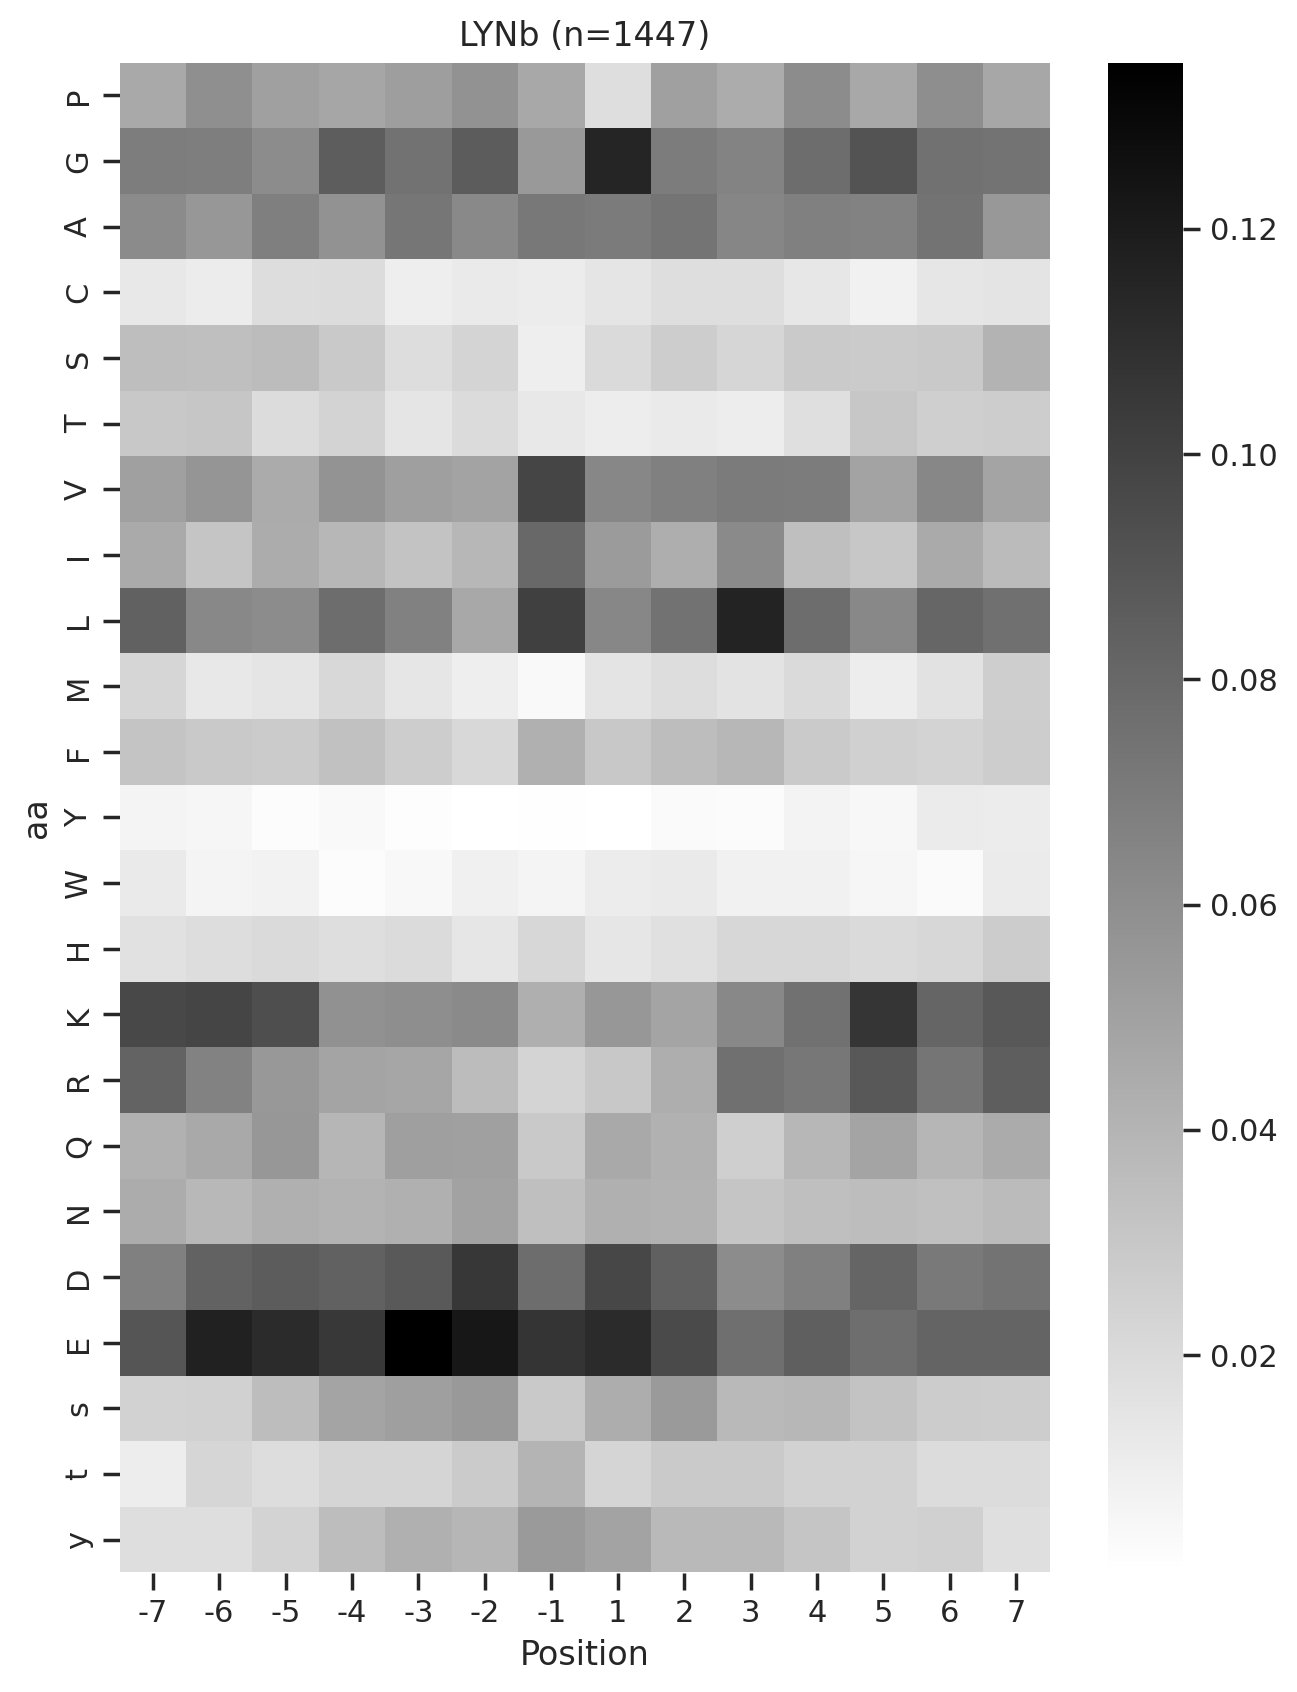

  0%|          | 0/36 [00:01<?, ?it/s]


In [ ]:
for k in tqdm(others,total=len(others)):
    df_k = df.query(f'kinase=="{k}"')
    
    plot_count(df_k,k)
    # plt.savefig(f'fig_others/count/{k.replace("/", "_")}.png',bbox_inches='tight', pad_inches=0.1)
    plt.show() # if visualize in jupyter notebook, uncheck the savefig
    plt.close()
    
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)
    
    get_logo2(full,k)
    # plt.savefig(f'fig_others/logo/{k.replace("/", "_")}.png',bbox_inches='tight', pad_inches=0.3)
    plt.show()
    plt.close()
    
    plot_heatmap(full.drop(columns=[0]),f'{k} (n={len(df_k)})',figsize=(7.5,10))
    # plt.savefig(f'fig_others/heatmap/{k.replace("/", "_")}.png',bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    
    break

## Combine the figures for pdf

Uncomment below to run

In [ ]:
# folders = ["fig_others/count", "fig_others/logo", "fig_others/heatmap"]
# for k in tqdm(others,total = len(others)):
#     k = k.replace("/", "_")
    
#     filename = f"{k}.png"
    
#     image_paths = [os.path.join(folder, filename) for folder in folders]
    
#     output_path = f"fig_others/combine/{k}.png"
    
#     combine_images_vertically(image_paths, output_path)
#     # break

## Get the PSSMs of other kinases

In [ ]:
for i,k in enumerate(others):
    df_k = df.query(f'kinase=="{k}"')
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)
    
    melt = full.drop(columns = [0]).reset_index().melt(id_vars=['aa'], value_name=k, var_name='Position')
    melt['substrate']=melt['Position'].astype(str)+ melt['aa']

    position_0 = full[0][['s','t','y']].reset_index().rename(columns={0:k})
    position_0['substrate'] = '0'+position_0['aa']

    if i ==0:
        first = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
    else:
        k = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
        data = pd.concat([first,k],axis=1)
        first = data.copy()

In [ ]:
data = data.T

data.index = data.index.rename('kinase')

To save:

In [ ]:
# data.to_csv('supp/CDDM_others.csv')

# data.to_parquet('ks_others.parquet')